

https://www.ncbi.nlm.nih.gov/pubmed/16348228


$$\ X = X_0 e^{µ_{max} t}$$

Where:
- X is biomass at time t (h)
- X0 is biomass at time 0
- µmax is the maximum specific growth rate (h-1)


![](calc.png)

In [19]:
from datetime import timedelta
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import dateparser

In [2]:
def exp_growth(t, X0, µmax):
    # X0 initial OD600 or OD640 value
    # t = time (h)
    # mumax maximum growth rate (1/h)
    return X0 * np.exp(µmax * t)

In [3]:
def inv_exp_growth(X, X0, µmax):
    # X0 initial OD600 or OD640 value
    # t = time (h)
    # mumax maximum growth rate (1/h)
    return np.log(X/X0)/µmax

In [4]:
timepoints = """
13:00:00
17:22:00
18:40:00
"""

OD = """
0.208
0.610
0.8403
"""

In [5]:
times = [dateparser.parse(t) for t in timepoints.split()]
timezero = times[0]
tdeltas = [(t - timezero).seconds/3600 for t in times]

In [6]:
x_data = np.array(tdeltas)
y_data = np.array(OD.split(), dtype='f')

In [7]:
print(list(zip(x_data,y_data)))

[(0.0, 0.208), (4.366666666666666, 0.61), (5.666666666666667, 0.8403)]


In [8]:
popt, pcov = curve_fit(exp_growth, 
                       x_data, 
                       y_data,
                       bounds=([0.0, 0.0], [1.0, 1.0]))

In [9]:
x_sim = np.arange(x_data[0], x_data[-1], (x_data[-1]-x_data[0])/100)
y_sim = exp_growth( x_sim , *popt)

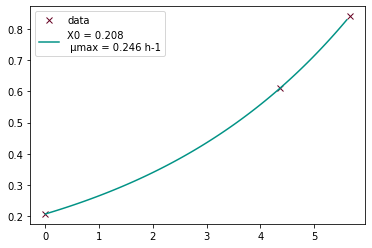

In [10]:
points     = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")


regression = plt.plot(x_sim, y_sim, color='xkcd:teal', 
                      label = "X0 = {:.3f} \n µmax = {:.3f} h-1".format(*popt))


plt.legend()
plt.show()

In [34]:
print(( timezero + timedelta( hours = inv_exp_growth(y_data[0] * 2 *2, *popt) ) ).strftime("%H:%M:%S"))

18:37:34
